<a href="https://colab.research.google.com/github/shdkjsijjkhjakjfeiefj/Deep_Learning_Techniques_Lab/blob/main/Lab_6_RA047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

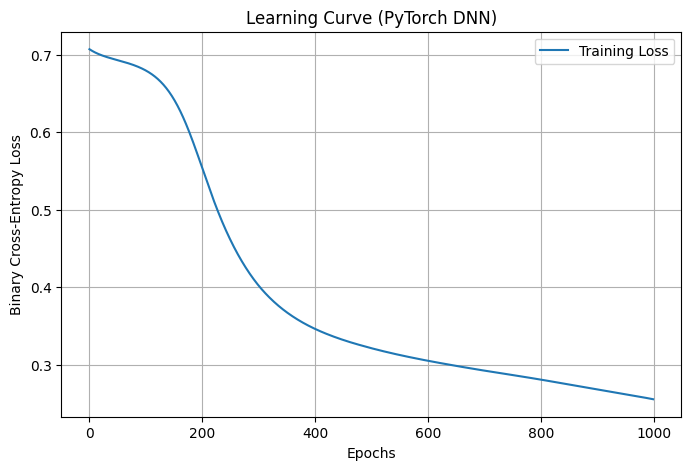

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ----- Dataset -----
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train, y_train = torch.FloatTensor(X_train), torch.FloatTensor(y_train)
X_test, y_test = torch.FloatTensor(X_test), torch.FloatTensor(y_test)

# ----- Neural Network -----
class DeepNN(nn.Module):
    def __init__(self):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.sigmoid(self.fc3(out))  # binary classification
        return out

# Initialize model, loss function, optimizer
model = DeepNN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

# ----- Training Loop -----
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Save loss
    losses.append(loss.item())

# ----- Plot Learning Curve -----
plt.figure(figsize=(8,5))
plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Learning Curve (PyTorch DNN)")
plt.legend()
plt.grid(True)
plt.show()
